### 목표
- yolov6에 데이터셋을 입력하여 학습시키고 활용해보자
- yolo사용법을 익혀보자

In [1]:
# 경로 이동
# Yolo 파일 설치 연결할 경로 설정
%cd /content/drive/MyDrive/colab/DeepLearning_빅데16차/yolo_study






/content/drive/MyDrive/colab/DeepLearning_빅데16차/yolo_study


In [2]:
# yolov6 다운 및 설치
!git clone https://github.com/meituan/YOLOv6

Cloning into 'YOLOv6'...
remote: Enumerating objects: 3635, done.
remote: Counting objects: 100% (3635/3635), done.
remote: Compressing objects: 100% (1468/1468), done.
remote: Total 3635 (delta 2177), reused 3446 (delta 2107), pack-reused 0
Receiving objects: 100% (3635/3635), 42.94 MiB | 18.57 MiB/s, done.
Resolving deltas: 100% (2177/2177), done.
Updating files: 100% (231/231), done.


In [3]:
# yolov6 버전에 맞는 라이브러리 모음 설치 실행
!pip install -r YOLOv6/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 103.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 101.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [4]:
%cd YOLOv6

/content/drive/MyDrive/colab/DeepLearning_빅데16차/yolo_study/YOLOv6


In [5]:
# 데이터셋 준비하기
# -Roboflow 사이트에서 데이터 셋 준비 완료! 
# 선생님이 데이터셋 주신거 복붙해보기
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LFl9gm9dS9xBAY6MSV2f")
project = rf.workspace("yolo-ike41").project("chinchilla_detection")
dataset = project.version(1).download("mt-yolov6")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=25573c834027ab40620b012fdd828ecaaf225c96f15402a666e0d1cbff28a13f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
   

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to chinchilla_detection-1 in mt-yolov6:: 100%|██████████| 197/197 [00:01<00:00, 163.22it/s]


In [6]:
# 이걸 실행하면 위에 뜨는 에러가 나지 않음(왜인지는 모르신다구..)
!pip install addict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# yolov6모델 훈련시키기
!python tools/train.py --batch 32 --conf configs/yolov6s_finetune.py --epochs 100 --data chinchilla_detection-1/data.yaml --device 0


2023-05-22 01:29:05.021794: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 01:29:05.902296: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using 1 GPU for training... 
training args are: Namespace(data_path='chinchilla_detection-1/data.yaml', conf_file='configs/yolov6s_finetune.py', img_size=640, rect=False, batch_size=32, epochs=100, workers=8, device='0', eval_interval=20, eval_final_only=False, heavy_eval_range=50, check_images=False, check_labels=False, output_dir='./runs/train', name='exp', dist_url='env://', gpu_count=0, local_rank=-1, resume=False, write_trainbatch_tb=False, stop_aug_last_n_epoch=15, save_ckpt_on_last_n_epoch=-1, distill=False, distill_feat=False, quant=False, ca

In [8]:
# 예측 infer
!python tools/infer.py --yaml chinchilla_detection-1/data.yaml --weights runs/train/exp/weights/best_ckpt.pt --source chinchilla_detection-1/images/test/ --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='chinchilla_detection-1/images/test/', webcam=False, webcam_addr='0', yaml='chinchilla_detection-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 6/6 [00:00<00:00, 18.02it/s]
Results saved to runs/inference/exp


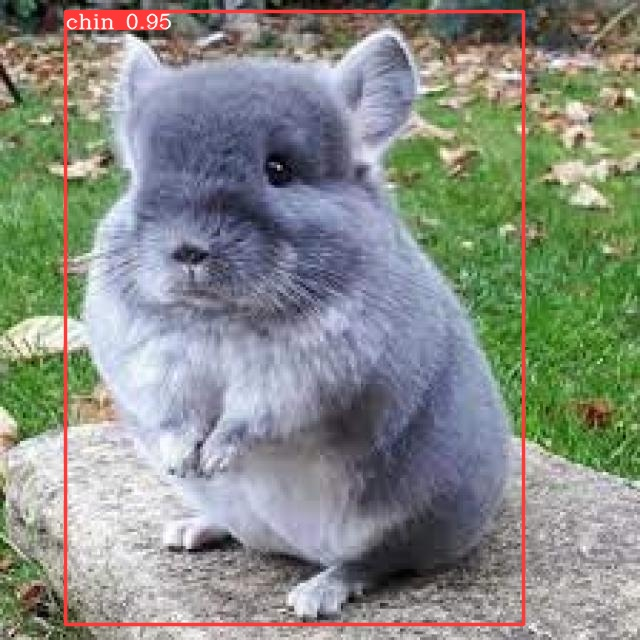

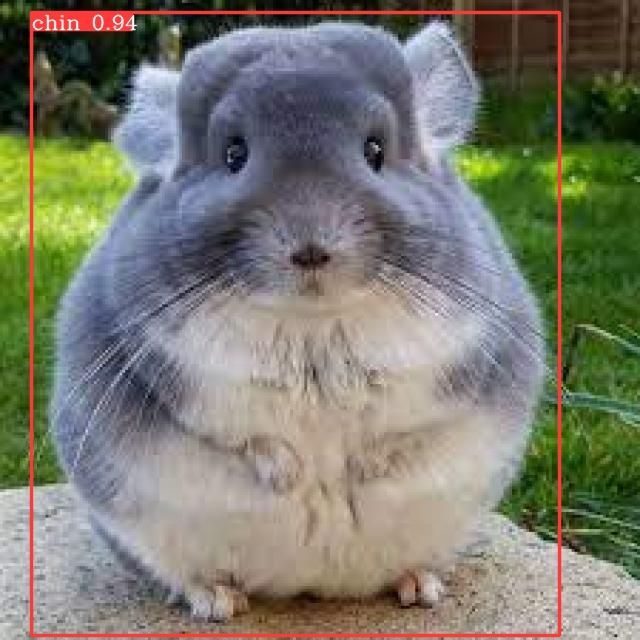

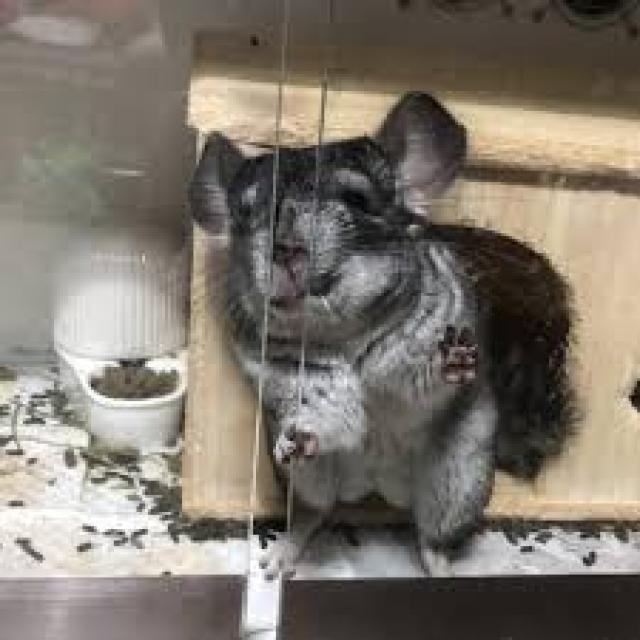

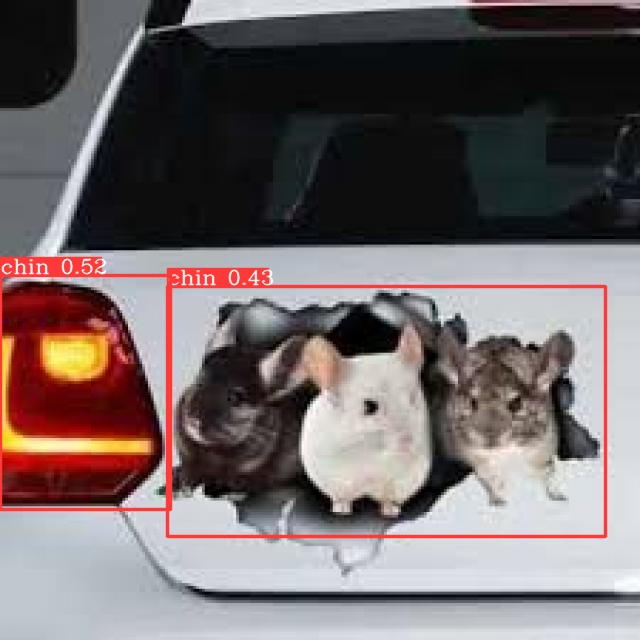

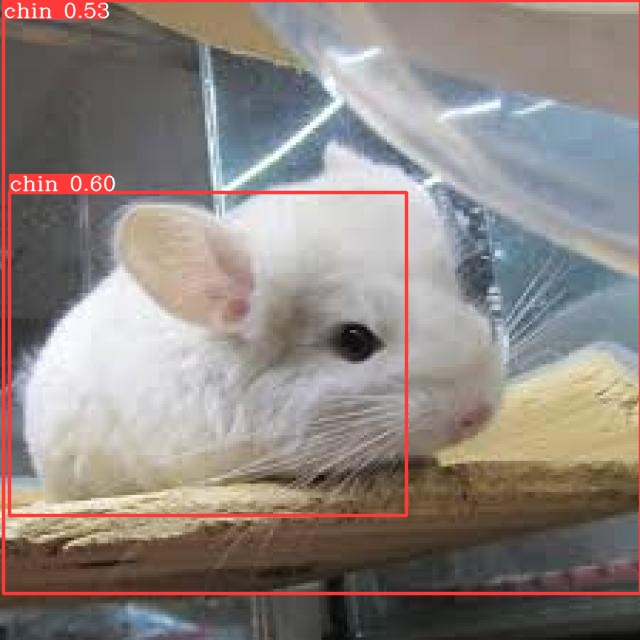

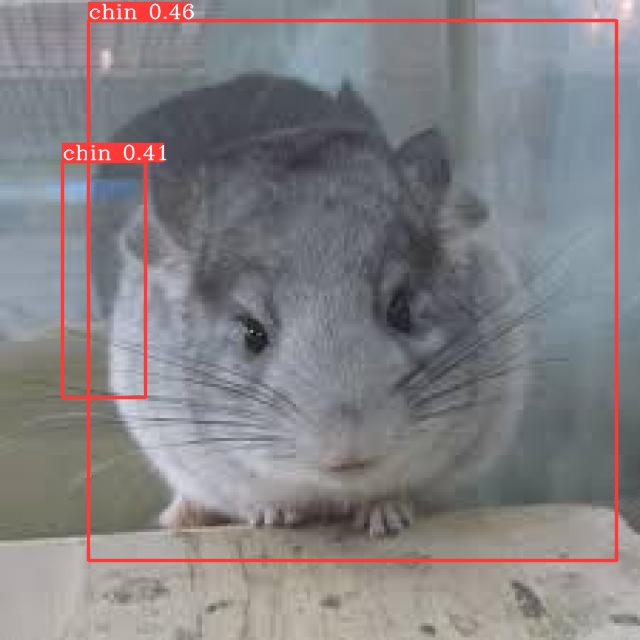

In [11]:
import glob
from IPython.display import Image,display

i = 0
limit = 10

for image_name in glob.glob('./runs/inference/exp/*.jpg'):
  if i < limit :
    display(Image(filename = image_name))
    print('\n')
  i +=1